In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel('Concrete Cleaned Data.xlsx')
data.head()

,Number,Partner Name,Bill Date,Due Date,Total Signed,Amount Due,Payment Status,Payment Date
0,FAC/2024/00182,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,605.0,605.0,False,May2024
1,FAC/2024/00181,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,2024-05-12,1595.0,1595.0,False,May2024
2,FAC/2024/00180,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-09,2024-05-09,1760.0,1760.0,False,May2024
3,FAC/2024/00178,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-08,2024-05-08,770.0,770.0,False,May2024
4,FAC/2024/00177,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-07,2024-05-07,1320.0,1320.0,False,May2024


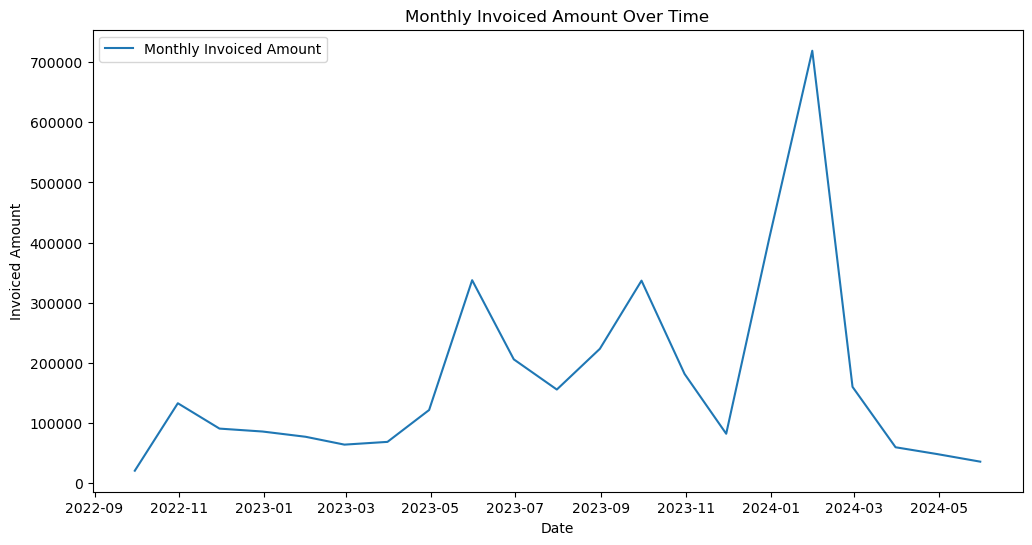

In [63]:
# Data preprocessing
data['Payment Date'] = pd.to_datetime(data['Payment Date'])
data['Bill Date'] = pd.to_datetime(data['Bill Date'])
data['Total Signed'] = pd.to_numeric(data['Total Signed'], errors='coerce')

# Fill NaN values with 0
#data['Total Signed'].fillna(0, inplace=True)

# Aggregate data by month
monthly_data = data.resample('M', on='Bill Date')['Total Signed'].sum()

# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Invoiced Amount')
plt.title('Monthly Invoiced Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Invoiced Amount')
plt.legend()
plt.show()

Mean Absolute Error: 4612.576540750813


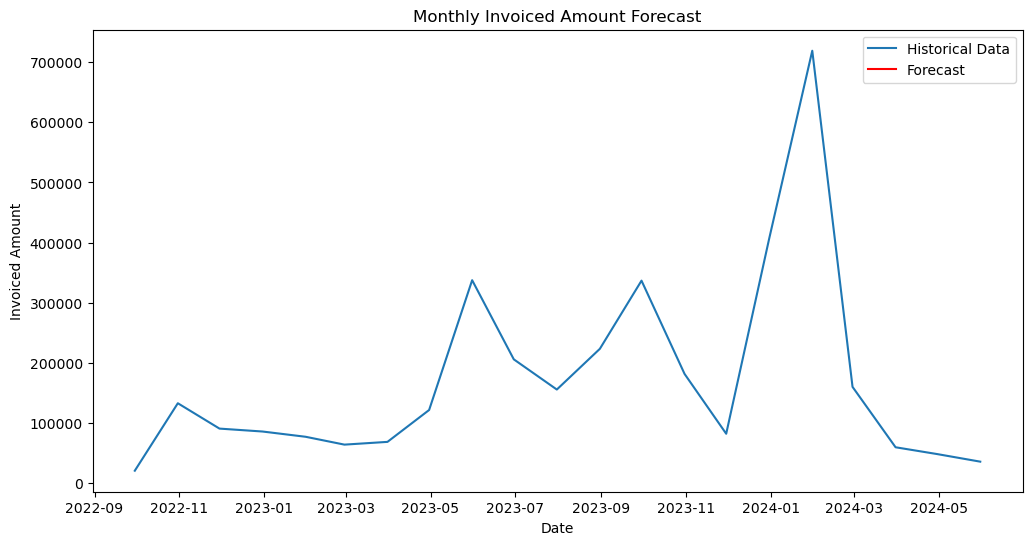

           Forecast
2024-06-30      NaN
2024-07-31      NaN
2024-08-31      NaN
2024-09-30      NaN
2024-10-31      NaN
2024-11-30      NaN
2024-12-31      NaN
2025-01-31      NaN
2025-02-28      NaN
2025-03-31      NaN
2025-04-30      NaN
2025-05-31      NaN


In [106]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit an ARIMA model
#model = ARIMA(monthly_data, order=(1, 1, 1))  # ARIMA(p, d, q)
#model_fit = model.fit()

# Define and fit the model
model = ARIMA(train_data['Total Signed'], order=(1, 0, 1))
model_fit = model.fit()

# Evaluate the model's performance
# Example: Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

predictions = model_fit.forecast(steps=len(test_data))
mae = mean_absolute_error(test_data['Total Signed'], predictions)

print("Mean Absolute Error:", mae)

# Forecasting future values
forecast_steps = 12  # Forecasting for the next 12 months
forecast = model_fit.forecast(steps=forecast_steps)

# Creating a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=monthly_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Historical Data')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Monthly Invoiced Amount Forecast')
plt.xlabel('Date')
plt.ylabel('Invoiced Amount')
plt.legend()
plt.show()

# Print the forecasted values
print(forecast_df)


In [65]:
df = pd.read_excel('Concrete Cleaned Data.xlsx', index_col='Bill Date')
df.head()

,Number,Partner Name,Due Date,Total Signed,Amount Due,Payment Status,Payment Date
Bill Date,,,,,,,
2024-05-12,FAC/2024/00182,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,605.0,605.0,False,May2024
2024-05-12,FAC/2024/00181,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-12,1595.0,1595.0,False,May2024
2024-05-09,FAC/2024/00180,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-09,1760.0,1760.0,False,May2024
2024-05-08,FAC/2024/00178,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-08,770.0,770.0,False,May2024
2024-05-07,FAC/2024/00177,"Mike' N Dad, Muhhamed Zaheer Warraich",2024-05-07,1320.0,1320.0,False,May2024


In [66]:
df = df.drop(['Number','Partner Name','Payment Date','Due Date','Amount Due','Payment Status'],axis=1)

In [67]:
df.head()

,Total Signed
Bill Date,
2024-05-12,605.0
2024-05-12,1595.0
2024-05-09,1760.0
2024-05-08,770.0
2024-05-07,1320.0


In [107]:
df.describe()

,Total Signed
count,765.000000
mean,4724.708889
std,19292.087967
min,120.000000
25%,770.000000
50%,1472.500000
75%,3420.000000
max,490000.000000


In [68]:
df.index

DatetimeIndex(['2024-05-12', '2024-05-12', '2024-05-09', '2024-05-08',
               '2024-05-07', '2024-05-07', '2024-05-07', '2024-05-05',
               '2024-05-04', '2024-05-02',
               ...
               '2022-09-27', '2022-09-22', '2022-09-20', '2022-09-20',
               '2022-09-15', '2022-09-11', '2022-09-07', '2022-09-06',
               '2022-09-06', '2022-09-03'],
              dtype='datetime64[ns]', name='Bill Date', length=765, freq=None)

In [45]:
#df['Bill Date'] = pd.to_datetime(df['Bill Date'], infer_datetime_format=True)


<function matplotlib.pyplot.show(close=None, block=None)>

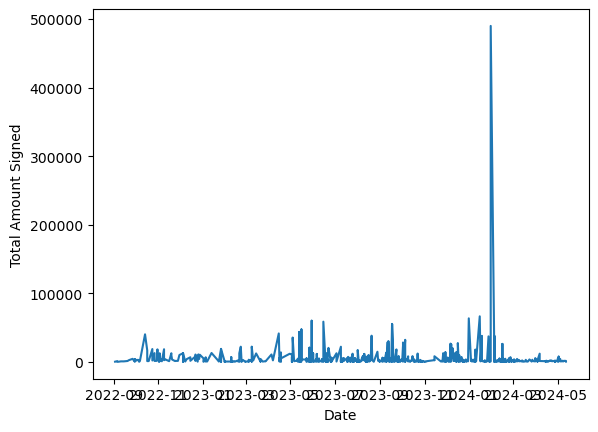

In [69]:
plt.xlabel('Date')
plt.ylabel('Total Amount Signed')
plt.plot(df)
plt.show

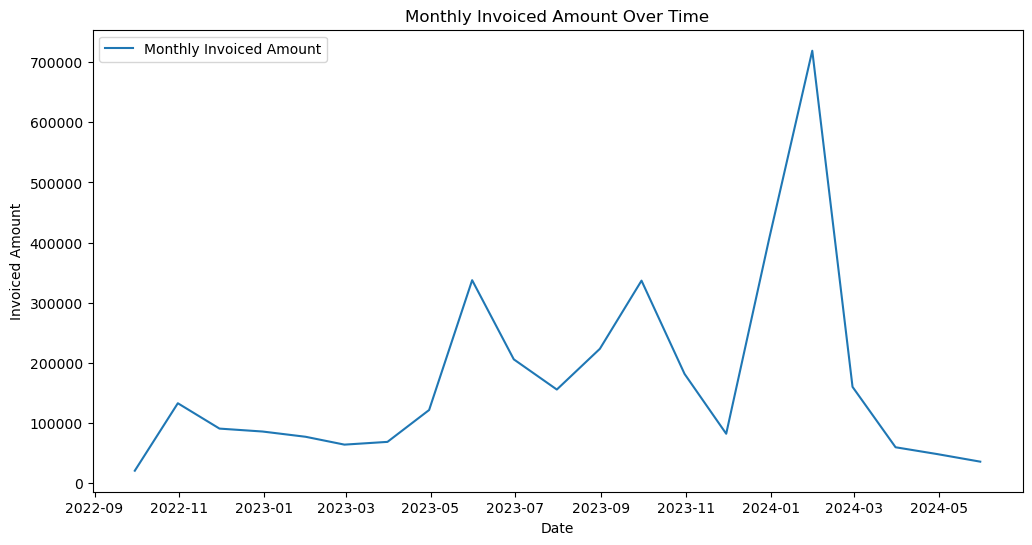

In [70]:
# Aggregate data by month
monthly_data = df.resample('M')['Total Signed'].sum()

# Plotting the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Invoiced Amount')
plt.title('Monthly Invoiced Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Invoiced Amount')
plt.legend()
plt.show()

In [71]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: ', result[0])
    print('p-value: ', result[1])
    print('Critical Values: ', result[4])

check_stationarity(df['Total Signed'])

ADF Statistic:  -27.781825950466594
p-value:  0.0
Critical Values:  {'1%': -3.438938229437747, '5%': -2.8653304587462944, '10%': -2.568788425002056}


In [110]:
# Train test split

n = int(len(df) * 0.8)
train = df[:n]
test = df[n:]

In [111]:
print(len(train))
print(len(test))

612
153


In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [136]:
model = ARIMA(train, order=(1,1,1))
result = model.fit()

In [137]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Signed   No. Observations:                  612
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6967.550
Date:                Mon, 17 Jun 2024   AIC                          13941.100
Time:                        16:18:04   BIC                          13954.346
Sample:                             0   HQIC                         13946.252
                                - 612                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0056      0.284     -0.020      0.984      -0.562       0.550
ma.L1         -0.9981      0.007   -137.674      0.000      -1.012      -0.984
sigma2      5.742e+08      1e-10   5.73e+18      0.000    5.74e+08    5.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           4938170.52
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            19.60
Prob(H) (two-sided):                  0.00   Kurtosis:                       441.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.13e+34. Standard errors may be unstable.
"""

In [143]:
step = 12
conf = result.forecast(step)

In [144]:
conf

612    4744.838692
613    4742.440613
614    4742.454149
615    4742.454072
616    4742.454073
617    4742.454073
618    4742.454073
619    4742.454073
620    4742.454073
621    4742.454073
622    4742.454073
623    4742.454073
Name: predicted_mean, dtype: float64

In [145]:
fc = pd.Series(conf, index=test[:step].index)
lower = pd.Series(conf[:,0], index=test[:step].index)
upper = pd.Series(conf[:,1], index=test[:step].index)

KeyError: 'key of type tuple not found and not a MultiIndex'

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

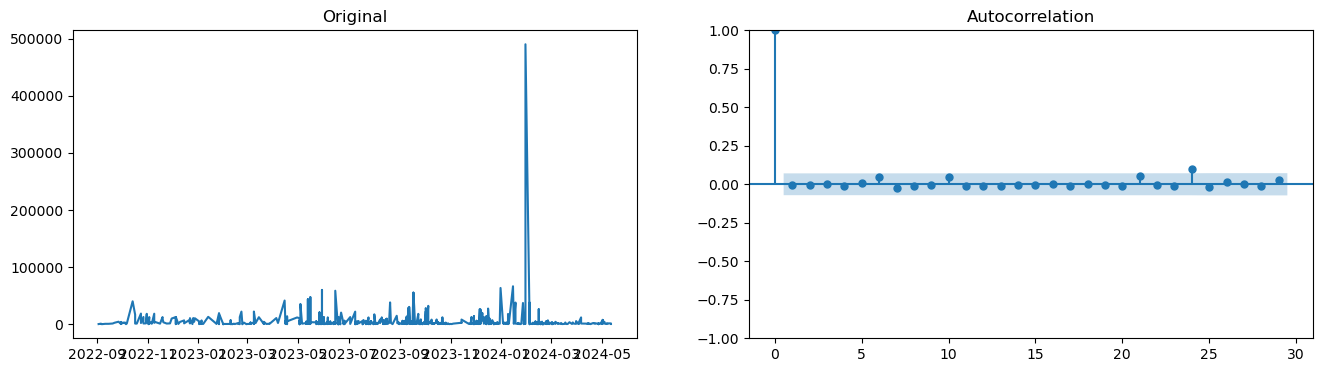

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df)
ax1.set_title('Original')
plot_acf(df, ax=ax2);

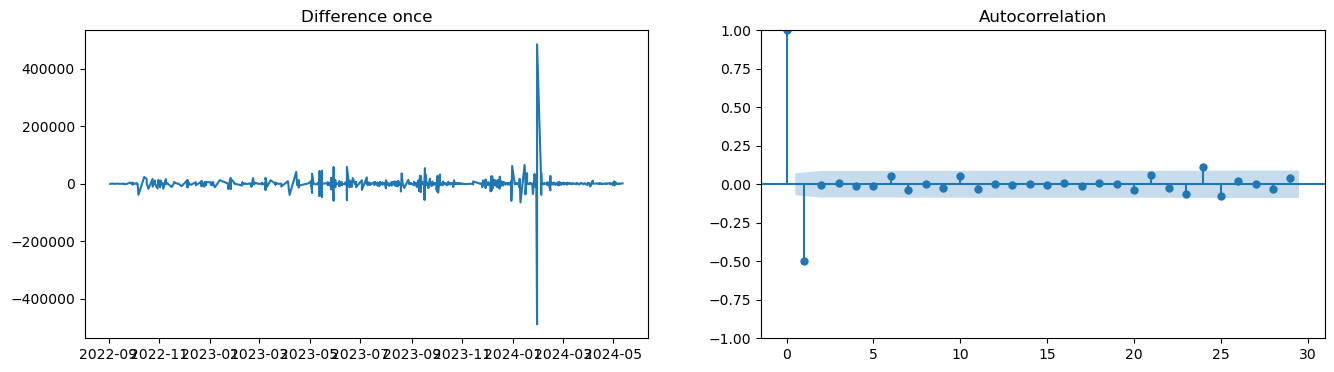

In [98]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

In [74]:
#diff = df.diff().diff().dropna()
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#ax1.plot(diff)
#ax1.set_title('Difference twice')
#plot_acf(diff, ax=ax2);

In [75]:
#pip install pmdarima

In [76]:
from pmdarima.arima.utils import ndiffs

In [77]:
ndiffs(df, test='adf')

0

In [95]:
from statsmodels.graphics.tsaplots import plot_pacf

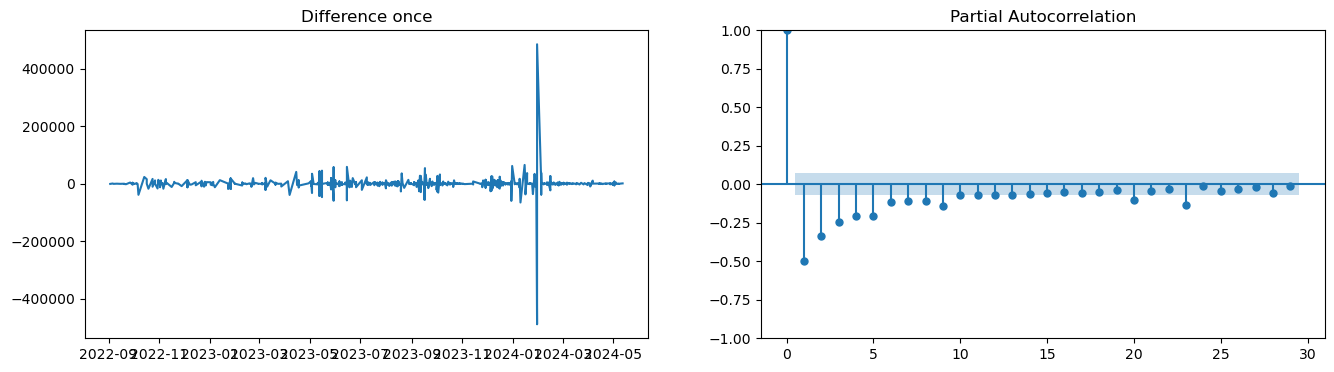

In [97]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

In [79]:
#diff.head()

In [80]:
#def check_stationarity(timeseries):
#    result = adfuller(timeseries)
#    print('ADF Statistic: ', result[0])
#    print('p-value: ', result[1])
#    print('Critical Values: ', result[4])

#check_stationarity(diff['Total Signed'])

In [81]:
#import numpy as np
#logScale = np.log(df)
#movingAverage = logScale.rolling(window=12).mean()
#movingSTD = logScale.rolling(window=12).std()

#plt.plot(logScale)
#plt.plot(movingAverage, color='red')
#plt.show()

In [60]:
#pip install fbprophet

## Using prophet model

In [61]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'Crusher Cleaned Data.xlsx'
df = pd.read_excel(file_path)

# Rename columns for ease of use
df.columns = ['Invoice Number', 'Partner Name', 'Bill Date', 'Due Date', 'Total Amount', 'Amount Due', 'Payment Status', 'Payment Date']

# Convert dates from Excel format to datetime
df['Bill Date'] = pd.to_datetime(df['Bill Date'], origin='1899-12-30', unit='D')
df['Due Date'] = pd.to_datetime(df['Due Date'], origin='1899-12-30', unit='D')

# Filter necessary columns and convert to datetime
df = df[['Bill Date', 'Total Amount']]

# Set 'Bill Date' as the index
df.set_index('Bill Date', inplace=True)

# Aggregate data by month
df = df.resample('M').sum()

# Reset index for Prophet
df.reset_index(inplace=True)
df.columns = ['ds', 'y']

# Initialize and train the model
model = Prophet()
model.fit(df)

# Make future dataframe for 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Optional: Plot components
fig2 = model.plot_components(forecast)
plt.show()


ModuleNotFoundError: No module named 'fbprophet'